In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

time: 553 ms (started: 2022-11-24 05:26:46 +00:00)


number of end_epoch: 4999


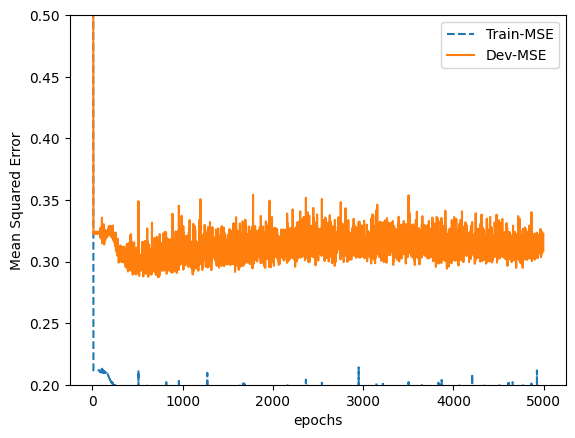

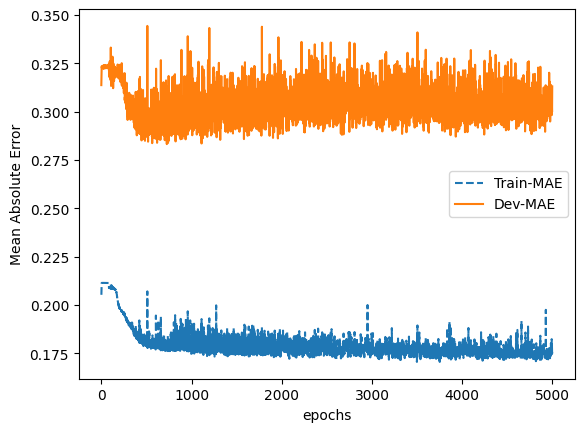

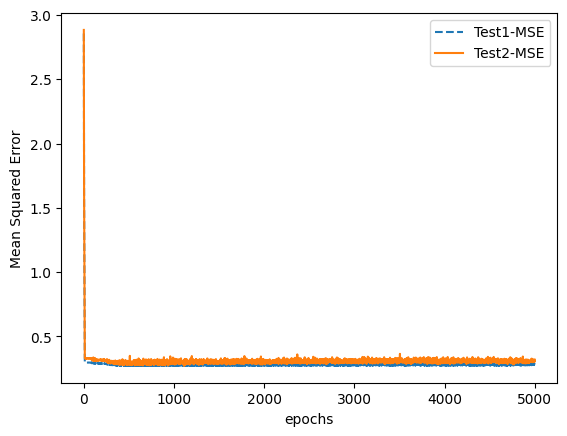

< OPT. SCORE_TOTAL EPOCH  1274 > : -4.043803608977642
opt. DEV MSE :  0.2989229261875152
opt. TEST1 MSE :  0.2884209454059601
opt. TEST2 MSE :  0.2812202870845794
time: 346 ms (started: 2022-11-24 05:27:50 +00:00)


In [6]:
ELBOW = 5

scores = pd.read_csv("../arima_lstm_hybrid_model_train/results/sp500_20082017_corr_ser_reg_hrchy_10_cluster-train_train-kS_hyper_lstm_evaluation.csv")
mse_columns = ['TRAIN_MSE','DEV_MSE']
mae_columns = ['TRAIN_MAE','DEV_MAE']
test_columns = ['TEST1_MSE', 'TEST2_MSE']

#print(scores)

end_epoch = scores.shape[0]
print(f"number of end_epoch: {end_epoch}")
plt.plot(scores[mse_columns[0]][:end_epoch],'--', label="Train-MSE")
plt.plot(scores[mse_columns[1]][:end_epoch], label="Dev-MSE")
plt.legend()
plt.ylim([0.2, 0.5])
plt.xlabel('epochs')
plt.ylabel('Mean Squared Error')
plt.show()
plt.close()
plt.plot(scores[mae_columns[0]][:end_epoch],'--', label="Train-MAE")
plt.plot(scores[mae_columns[1]][:end_epoch], label="Dev-MAE")
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Mean Absolute Error')
plt.show()
plt.close()
plt.plot(scores[test_columns[0]][:end_epoch],'--', label="Test1-MSE")
plt.plot(scores[test_columns[1]][:end_epoch], label="Test2-MSE")
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Mean Squared Error')
plt.show()
plt.close()



mse_columns = ['TRAIN_MSE','DEV_MSE']
score_diff = (scores[mse_columns[1]]-scores[mse_columns[0]])[ELBOW:]
score_sum = (scores[mse_columns[1]]+scores[mse_columns[0]])[ELBOW:]
score_diff = (scores['DEV_MSE'] - scores['TRAIN_MSE'])
score_sum = (scores['DEV_MSE'] + scores['TRAIN_MSE'])

score_diff_norm = (score_diff - np.mean(score_diff))/np.std(score_diff)
score_sum_norm = (score_sum - np.mean(score_sum))/np.std(score_sum)
score_total = score_diff_norm + score_sum_norm
idx = np.argmin(score_total)
print('< OPT. SCORE_TOTAL EPOCH ',str(idx+1),'> : '+str(score_total[idx]))
print('opt. DEV MSE : ',str(scores[mse_columns[1]][idx]))
print('opt. TEST1 MSE : ',str(scores[test_columns[0]][idx]))
print('opt. TEST2 MSE : ',str(scores[test_columns[1]][idx]))

In [3]:
print(idx)
for i in range(4510, 4610):
    print(i+1, score_total[i])

1589
4511 -0.8731309398088964
4512 -0.8541574101042261
4513 -0.42479166834972615
4514 0.1687472457245993
4515 0.9212078342780494
4516 0.9723197717632255
4517 -1.6670744493817935
4518 0.8473498133682186
4519 -0.3207388586864736
4520 -1.5585926918625006
4521 -0.4778067017746134
4522 0.8489466453394748
4523 -1.180749360015004
4524 -0.7685551981925416
4525 0.4869572736022281
4526 -0.44459101151397995
4527 1.0907338573739387
4528 0.43683273640193054
4529 2.942280535943893
4530 0.7636729950988075
4531 -0.7679396875062633
4532 -0.8704464769266024
4533 0.8892785954155448
4534 0.29867050483181645
4535 -0.9792748941703688
4536 -0.4974153672274424
4537 -0.5855658140179024
4538 -0.6447633451236328
4539 0.4609178511495638
4540 -1.611238752713061
4541 0.7486898139204716
4542 -0.3570350584722337
4543 1.329461045202302
4544 0.3595307096563788
4545 -2.1008623787680296
4546 0.8292964594309191
4547 0.28894507301096395
4548 -0.15297643303682312
4549 0.644065807389269
4550 0.9390042700237469
4551 -0.103517